In [2]:
! python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 5.2 MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047105 sha256=254179854df259dba5a3cbc28be5f8ee87fc557a59ee0f29bd5609b85fe9d9e9
  Stored in directory: /root/.cache/pip/wheels/b7/0d/f0/7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.4.1
    Uninstalling en-core-web-sm-3.4.1:
      Successfully uninstalled en-core-web-sm-3.4.1
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [3]:
! pip install texthero -q

In [4]:
import numpy as np
import pandas as pd
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
pcf_gen = pd.read_csv("pcf-general.csv")

In [12]:
spl_gen_1 = pd.read_csv("spl-gen-1.csv")
spl_gen_2 = pd.read_csv("spl-gen-2.csv")

In [13]:
spl_gen = pd.concat([spl_gen_1, spl_gen_2], axis=0, ignore_index=True)

In [14]:
df1 = pd.DataFrame(pcf_gen)

In [15]:
df1 = df1.drop(['Attachments', 'Reactions'], axis=1)

In [16]:
new_df1 = df1.groupby("AuthorID").agg(lambda x:x.tolist())

In [17]:
df2 = pd.DataFrame(spl_gen)

In [18]:
df2 = df2.drop(['Attachments', 'Reactions'], axis=1)

In [19]:
new_df2 = df2.groupby("AuthorID").agg(lambda x:x.tolist())

In [20]:
common = new_df1.merge(new_df2, on=["AuthorID"])

In [21]:
pcf_gen_common = common.drop(["Author_y","Content_y","Date_y"], axis = 1)

In [22]:
spf_gen_common = common.drop(["Author_x","Content_x","Date_x"], axis = 1)

In [23]:
pcf_gen_common["Author"] = [l[0] for l in pcf_gen_common["Author_x"]]

In [24]:
pcf_gen_common.drop(['Author_x'], axis = 1)

,Date_x,Content_x,Author
AuthorID,,,
85614143951892480,"[04-Jul-18 09:37 AM, 04-Jul-18 09:37 AM, 04-Ju...",[woah there buttmunch tryin' to cheat the syst...,UB3R-B0T#3802
106634422022860800,"[03-Apr-19 09:50 PM, 03-Apr-19 09:50 PM, 03-Ap...","[:javoShock: I got to think about it, Thanks!,...",MaralinaSakura#1304
155149108183695360,"[14-Dec-18 03:34 PM, 14-Dec-18 03:35 PM, 07-Ja...","[nan, nan, Wife: Honey I’m pregnant.\r\n\r\nMe...",Dyno#3861
172002275412279296,"[23-Feb-21 09:15 PM, 25-Feb-21 11:23 PM, 08-Ma...","[nan, nan, nan, > **Viewing server rankings • ...",Tatsu#8792
173889000015134720,"[30-Jul-20 01:07 AM, 30-Jul-20 01:08 AM, 30-Ju...",[uhh dskdjdl probably high school story and mi...,faede#0003
...,...,...,...
786672447935348737,"[05-May-21 11:35 AM, 05-May-21 12:21 PM, 05-Ma...","[hello! glad to be here., pig practicals in bi...",cressidastclaire#3536
806489789574545458,[18-Apr-21 09:38 PM],"[sure, thanks]",Hell-Volhard#4976
831172293945720852,"[28-Apr-21 10:22 AM, 28-Apr-21 10:23 AM, 28-Ap...","[Hiiiiiii, And we may or may not regret it lol...",Yume Not.#8543


In [25]:
spf_gen_common["Author"] = [l[0] for l in spf_gen_common["Author_y"]]

In [26]:
spf_gen_common.drop(["Author_y"], axis = 1)

,Date_y,Content_y,Author
AuthorID,,,
85614143951892480,"[07-Sep-20 11:02 PM, 07-Sep-20 11:06 PM, 07-Se...","[cool cool cool, cool cool cool, T_T, I know.,...",UB3R-B0T#3802
106634422022860800,"[05-Sep-20 12:44 AM, 05-Sep-20 12:44 AM, 05-Se...","[:CatriaYay:, Just ask one of us what you want...",MaralinaSakura#1304
155149108183695360,"[03-Oct-20 04:07 AM, 04-Oct-20 09:30 PM, 04-Oc...","[Its Baby Dump without a Bump (BD), Its Baby D...",Dyno#3861
172002275412279296,"[05-Sep-20 12:56 AM, 05-Sep-20 02:03 AM, 05-Se...","[nan, nan, nan, nan, > **‎Viewing rank card •...",Tatsu#8792
173889000015134720,"[07-Sep-20 10:37 AM, 07-Sep-20 10:39 AM, 07-Se...","[omg hana my love, i go for both yea, tru, Thi...",faede#0003
...,...,...,...
786672447935348737,"[06-May-21 11:48 PM, 06-May-21 11:57 PM, 06-Ma...","[... what. that's a joke, right?, If that's tr...",cressidastclaire#3536
806489789574545458,[07-Aug-21 07:32 PM],[Same lol],Hell-Volhard#4976
831172293945720852,"[21-Aug-21 04:01 PM, 25-Aug-21 11:29 AM, 25-Au...","[I love the channel namesssss, Whoa... This is...",Yume Not.#8543


In [27]:
pcf_gen_common.drop(["Date_x", "Author_x"],axis = 1)

,Content_x,Author
AuthorID,,
85614143951892480,[woah there buttmunch tryin' to cheat the syst...,UB3R-B0T#3802
106634422022860800,"[:javoShock: I got to think about it, Thanks!,...",MaralinaSakura#1304
155149108183695360,"[nan, nan, Wife: Honey I’m pregnant.\r\n\r\nMe...",Dyno#3861
172002275412279296,"[nan, nan, nan, > **Viewing server rankings • ...",Tatsu#8792
173889000015134720,[uhh dskdjdl probably high school story and mi...,faede#0003
...,...,...
786672447935348737,"[hello! glad to be here., pig practicals in bi...",cressidastclaire#3536
806489789574545458,"[sure, thanks]",Hell-Volhard#4976
831172293945720852,"[Hiiiiiii, And we may or may not regret it lol...",Yume Not.#8543


In [28]:
pcf_gen_common["Content"] = [",".join(map(str, l)) for l in pcf_gen_common["Content_x"]]

In [29]:
pcf_gen_common

,Author_x,Date_x,Content_x,Author,Content
AuthorID,,,,,
85614143951892480,"[UB3R-B0T#3802, UB3R-B0T#3802, UB3R-B0T#3802, ...","[04-Jul-18 09:37 AM, 04-Jul-18 09:37 AM, 04-Ju...",[woah there buttmunch tryin' to cheat the syst...,UB3R-B0T#3802,woah there buttmunch tryin' to cheat the syste...
106634422022860800,"[MaralinaSakura#1304, MaralinaSakura#1304, Mar...","[03-Apr-19 09:50 PM, 03-Apr-19 09:50 PM, 03-Ap...","[:javoShock: I got to think about it, Thanks!,...",MaralinaSakura#1304,":javoShock: I got to think about it,Thanks!,Fa..."
155149108183695360,"[Dyno#3861, Dyno#3861, Dyno#3861, Dyno#3861, D...","[14-Dec-18 03:34 PM, 14-Dec-18 03:35 PM, 07-Ja...","[nan, nan, Wife: Honey I’m pregnant.\r\n\r\nMe...",Dyno#3861,"nan,nan,Wife: Honey I’m pregnant.\r\n\r\nMe: W..."
172002275412279296,"[Tatsu#8792, Tatsu#8792, Tatsu#8792, Tatsu#879...","[23-Feb-21 09:15 PM, 25-Feb-21 11:23 PM, 08-Ma...","[nan, nan, nan, > **Viewing server rankings • ...",Tatsu#8792,"nan,nan,nan,> **Viewing server rankings • [** ..."
173889000015134720,"[faede#0003, faede#0003, faede#0003, faede#000...","[30-Jul-20 01:07 AM, 30-Jul-20 01:08 AM, 30-Ju...",[uhh dskdjdl probably high school story and mi...,faede#0003,uhh dskdjdl probably high school story and mic...
...,...,...,...,...,...
786672447935348737,"[cressidastclaire#3536, cressidastclaire#3536,...","[05-May-21 11:35 AM, 05-May-21 12:21 PM, 05-Ma...","[hello! glad to be here., pig practicals in bi...",cressidastclaire#3536,"hello! glad to be here.,pig practicals in biol..."
806489789574545458,[Hell-Volhard#4976],[18-Apr-21 09:38 PM],"[sure, thanks]",Hell-Volhard#4976,"sure, thanks"
831172293945720852,"[Yume Not.#8543, Yume Not.#8543, Yume Not.#854...","[28-Apr-21 10:22 AM, 28-Apr-21 10:23 AM, 28-Ap...","[Hiiiiiii, And we may or may not regret it lol...",Yume Not.#8543,"Hiiiiiii,And we may or may not regret it lol 🤣..."


In [30]:
new_pcf_gen_common = pcf_gen_common.drop(["Date_x", "Author_x","Content_x"],axis = 1)

In [31]:
new_pcf_gen_common

,Author,Content
AuthorID,,
85614143951892480,UB3R-B0T#3802,woah there buttmunch tryin' to cheat the syste...
106634422022860800,MaralinaSakura#1304,":javoShock: I got to think about it,Thanks!,Fa..."
155149108183695360,Dyno#3861,"nan,nan,Wife: Honey I’m pregnant.\r\n\r\nMe: W..."
172002275412279296,Tatsu#8792,"nan,nan,nan,> **Viewing server rankings • [** ..."
173889000015134720,faede#0003,uhh dskdjdl probably high school story and mic...
...,...,...
786672447935348737,cressidastclaire#3536,"hello! glad to be here.,pig practicals in biol..."
806489789574545458,Hell-Volhard#4976,"sure, thanks"
831172293945720852,Yume Not.#8543,"Hiiiiiii,And we may or may not regret it lol 🤣..."


In [32]:
new_pcf_gen_common["pca"] = (new_pcf_gen_common["Content"]
                             .pipe(hero.clean)
                             .pipe(hero.tfidf)
                             .pipe(hero.pca)
                             )


In [33]:
hero.scatterplot(new_pcf_gen_common, col="pca", title = "PCA for Author Attribution")

In [34]:
from sklearn.cluster import KMeans

In [35]:
docs = new_pcf_gen_common["Content"].values.astype("U")

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(docs)

In [38]:
K = range(1,12)
wss = []
for k in K:
    kmeans = KMeans(n_clusters = k,init = "k-means++")
    kmeans = kmeans.fit(features.toarray())
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [39]:
mycenters = pd.DataFrame({"Clusters":K,"WSS":wss})
mycenters

,Clusters,WSS
0,1,55.250826
1,2,49.211025
2,3,47.445335
3,4,45.241113
4,5,44.281704
5,6,43.339790
6,7,42.259450
7,8,41.014790
8,9,40.278268
9,10,39.014338


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

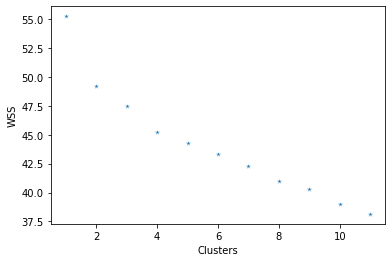

In [42]:
sns.scatterplot(x = "Clusters", y = "WSS", data = mycenters, marker="*")

In [43]:
kmeans = KMeans(n_clusters = 4,init = 'k-means++')
kmeans = kmeans.fit(features)

In [45]:
new_pcf_gen_common["Clusters"] = kmeans.labels_

In [46]:
clusters = new_pcf_gen_common.groupby('Clusters')

for cluster in clusters.groups:
    f = open('cluster_exp'+str(cluster)+ '.csv', 'w', encoding='utf-8') # create csv file
    data_new = clusters.get_group(cluster)[['Author','Content']] # get title and overview columns
    f.write(data_new.to_csv()) # set index to id
    f.close()

In [47]:
print("Cluster centroids: \n")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(4):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :4]:
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 like
 just
 lol
 don
------------
Cluster 1:
 hi
 yup
 channels
 mal
------------
Cluster 2:
 li
 thanks
 thank
 book
------------
Cluster 3:
 nan
 woods
 lee
 hana
------------
